In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_file = 'Resources/VacuumTowerData.csv'
data_df = pd.read_csv(data_file)
data_df.head()

C:\Users\JPHeb\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (3,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Batch,Hrs Grp,Hr,B_Charge Tank,Date,Time,Hours,B_EXCHANGE OUTLET,Y_Htr Outlet Temp,B_127 Stream Temp,...,B_HEATER INLET,B_VACmmHg,Actual_VTB,Theoretical_VTB,B_Yield Variance VGO,B_Yield Variance 127,B_Yield Variance 140,B_Yield Variance 152,B_Yield Variance 160,B_Yield Variance VTB
0,1,17,1,79,1/1/2014,9:00:00 AM,17,498.0,738.0,391.0,...,39.0,40.0,0.144335,0.11,-0.021826,-0.001935,0.001662,0.033842,-0.004151,0.034335
1,1,17,2,79,1/1/2014,5:00:00 PM,17,498.0,737.0,390.0,...,39.0,40.0,0.144335,0.11,-0.021826,-0.002616,0.002343,-0.002943,-0.004151,0.034335
2,1,17,3,79,1/1/2014,2:00:00 PM,17,498.0,738.0,391.0,...,39.0,40.0,0.144335,0.11,-0.021126,-0.001672,0.003208,0.034403,-0.004151,0.034335
3,1,17,4,79,1/1/2014,11:00:00 PM,17,498.0,737.0,388.0,...,39.0,40.0,0.144335,0.11,-0.021065,-0.000790,0.006117,0.003986,-0.004151,0.034335
4,1,17,5,79,1/1/2014,8:00:00 AM,17,498.0,736.0,392.0,...,39.0,39.0,0.144335,0.11,-0.021053,-0.000613,0.007392,0.036669,-0.004151,0.034335


In [3]:
# description of index, entries, columns, data types, memory info
data_df.info

<bound method DataFrame.info of        Batch  Hrs Grp  Hr B_Charge Tank       Date         Time  Hours  \
0          1       17   1            79   1/1/2014   9:00:00 AM     17   
1          1       17   2            79   1/1/2014   5:00:00 PM     17   
2          1       17   3            79   1/1/2014   2:00:00 PM     17   
3          1       17   4            79   1/1/2014  11:00:00 PM     17   
4          1       17   5            79   1/1/2014   8:00:00 AM     17   
...      ...      ...  ..           ...        ...          ...    ...   
52726    998       17  13       79 & 41  6/10/2020   3:00:00 PM     17   
52727    998       17  14       79 & 41  6/10/2020   3:00:00 AM     17   
52728    998       17  15       79 & 41  6/10/2020   1:00:00 PM     17   
52729    998       17  16       79 & 41  6/10/2020   4:00:00 PM     17   
52730    998       17  17       79 & 41  6/10/2020   2:00:00 PM     17   

       B_EXCHANGE OUTLET  Y_Htr Outlet Temp  B_127 Stream Temp  ...  \
0       

In [4]:
# number of missing values as a percentage of total observations
data_df.isnull().sum()*100/len(data_df)

Batch                            0.000000
Hrs Grp                          0.000000
Hr                               0.000000
B_Charge Tank                    0.000000
Date                             0.000000
Time                             0.000000
Hours                            0.000000
B_EXCHANGE OUTLET                0.015171
Y_Htr Outlet Temp                0.000000
B_127 Stream Temp                0.000000
B_140 Stream Temp                0.000000
B_152 Stream Temp                0.000000
B_160 Stream Temp                0.001896
Y_Top Tower Temp                 0.003793
B_VAPOR_\nIZER                   0.011379
B_BTM                            0.015171
Y_Reflux Temp                    0.001896
Y_Pump Around Temp               0.001896
B_WASH                           0.030343
Y_127 to Storage Temp            0.005689
Y_140 to Storage Temp            0.007586
Y_152 to Storage Temp            0.005689
Y_160 to Storage Temp            0.005689
Y_VTB to Storage Temp            5

In [5]:
# drop all rows containing null
df = data_df.dropna()
print(df.isnull().values.any())

False


In [6]:
df['Date']= pd.to_datetime(df['Date'])

<ipython-input-6-fb5ecebf89eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']= pd.to_datetime(df['Date'])


In [7]:
df['Y_8TH TUBE'] = df['Y_8TH TUBE'].astype(float)


<ipython-input-7-ed640dec04d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y_8TH TUBE'] = df['Y_8TH TUBE'].astype(float)


In [38]:
df.columns

Index(['Batch', 'Hrs Grp', 'Hr', 'B_Charge Tank', 'Date', 'Time', 'Hours',
       'B_EXCHANGE OUTLET', 'Y_Htr Outlet Temp', 'B_127 Stream Temp',
       'B_140 Stream Temp', 'B_152 Stream Temp', 'B_160 Stream Temp',
       'Y_Top Tower Temp', 'B_VAPOR_\nIZER', 'B_BTM', 'Y_Reflux Temp',
       'Y_Pump Around Temp', 'B_WASH', 'Y_127 to Storage Temp',
       'Y_140 to Storage Temp', 'Y_152 to Storage Temp',
       'Y_160 to Storage Temp', 'Y_VTB to Storage Temp', 'B_VTB LEVEL',
       'Y_127 Strip Lvl Pcnt', 'Y_140 Strip Lvl Pcnt', 'Y_152 Strip Lvl Pcnt',
       'Y_160 Strip Lvl Pcnt', 'Y_Vacuum Charge Flow', 'Y_REFLUX',
       'Y_PUMP AROUND', 'Y_Wash Flow', 'Y_127 to Storage Flow',
       'Y_140 to Storage Flow', 'Y_152 to Storage Flow',
       'Y_160 to Storage Flow', 'B_VTB_TO_STRG', 'Y_8TH TUBE',
       'Y_Stripping Steam Tower Flow', 'Y_127 Stripping Stream Flow',
       'Y_140 Stripping Stream Flow', 'Y_152 Stripping Stream Flow',
       'Y_160 Stripping Stream Flow', 'B_HEATER INLE

In [8]:
data_2020 = df["Date"] >= '1/26/2020'
data_2020

10222    False
10232    False
10235    False
10244    False
10248    False
         ...  
52725     True
52726     True
52727     True
52728     True
52730     True
Name: Date, Length: 4180, dtype: bool

In [37]:
data_2020_df = df[data_2020]
print(data_2020_df.shape)


(3264, 54)


AttributeError: 'Series' object has no attribute 'columns'

In [10]:
# Keep on Y_value Columns
y_values_df = data_2020_df[['Y_Htr Outlet Temp', 'Y_Top Tower Temp', 'Y_Reflux Temp', 'Y_Pump Around Temp', 
       'Y_127 to Storage Temp', 'Y_140 to Storage Temp','Y_152 to Storage Temp', 'Y_160 to Storage Temp',
       'Y_VTB to Storage Temp', 'Y_127 Strip Lvl Pcnt', 'Y_140 Strip Lvl Pcnt', 'Y_152 Strip Lvl Pcnt',
       'Y_160 Strip Lvl Pcnt', 'Y_Vacuum Charge Flow', 'Y_REFLUX', 'Y_PUMP AROUND', 'Y_Wash Flow', 'Y_127 to Storage Flow',
       'Y_140 to Storage Flow', 'Y_152 to Storage Flow', 'Y_160 to Storage Flow', 'Y_8TH TUBE', 'Y_Stripping Steam Tower Flow',
       'Y_127 Stripping Stream Flow', 'Y_140 Stripping Stream Flow', 'Y_152 Stripping Stream Flow', 'Y_160 Stripping Stream Flow',
       'B_Yield Variance VTB']]

In [11]:
y_values_df

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,...,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,B_Yield Variance VTB
49466,739.97,269.64,150.03,190.14,222.71,234.88,199.40,208.55,234.79,64.97,...,58.50,28.99,5.28,455.63,426.87,249.04,-8.72,141.61,-9.18,0.099931
49467,740.01,268.81,149.82,190.14,223.29,236.09,200.64,209.25,233.37,65.03,...,58.51,27.98,6.40,457.02,416.80,252.25,0.07,141.60,0.20,0.094223
49468,740.02,270.69,150.01,190.38,222.86,235.36,199.70,210.44,232.76,64.99,...,58.50,29.01,5.31,455.94,437.62,251.25,-8.73,141.60,0.26,0.085395
49469,740.02,269.04,149.93,189.63,223.03,235.16,199.37,210.17,233.26,65.01,...,58.52,29.00,5.23,455.85,436.80,250.88,-8.72,141.59,0.31,0.091764
49470,739.99,270.02,150.08,190.25,223.52,236.07,201.36,209.00,235.91,64.98,...,58.50,28.34,5.96,456.51,416.23,251.50,-8.69,141.60,0.26,0.086243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52725,734.95,255.38,150.04,187.12,233.40,237.65,199.65,211.85,228.35,64.33,...,48.51,27.57,2.47,468.36,587.65,240.81,135.16,133.29,0.51,0.078972
52726,735.08,254.08,149.94,185.86,235.42,243.92,198.38,210.33,229.89,58.34,...,48.50,27.41,2.52,471.87,587.33,238.40,136.46,133.30,-9.10,0.074755
52727,735.04,255.28,150.08,186.15,227.43,232.44,197.66,202.35,228.32,64.99,...,48.50,27.59,1.32,469.98,599.81,241.29,157.93,133.29,0.13,0.060066
52728,734.63,255.46,149.87,186.14,234.87,242.11,201.84,213.23,228.14,58.87,...,48.50,27.41,2.25,471.10,585.82,238.26,131.64,133.24,0.12,0.080407


# Binning the data (Best, Better, Acceptable, Not Acceptable)

In [12]:
y_values_df['B_Yield Variance VTB'].describe()

count    3264.000000
mean        0.075925
std         0.019713
min         0.006980
25%         0.063082
50%         0.075172
75%         0.087553
max         0.199455
Name: B_Yield Variance VTB, dtype: float64

In [13]:
bins = [0, 0.059718, 0.072285, 0.084499, 0.199455]

In [14]:
# Create the names for the five bins
group_names = ["Best", "Better", "Acceptable", "Not Acceptable"]

In [15]:
y_values_df["VTB Results"] = pd.cut(df['B_Yield Variance VTB'], bins, labels=group_names, include_lowest=True)
y_values_df.head()
y_values_df.to_csv('Resources/clean_binned.csv',index=False)

<ipython-input-15-ebcc2ea85ac1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_values_df["VTB Results"] = pd.cut(df['B_Yield Variance VTB'], bins, labels=group_names, include_lowest=True)


In [42]:
binned_df = data_2020_df[['Actual_VTB', 'Theoretical_VTB','B_Yield Variance VTB']]
binned_df["VTB Results"] = pd.cut(df['B_Yield Variance VTB'], bins, labels=group_names, include_lowest=True)
binned_df.head()
binned_df.to_csv('Resources/binned.csv',index=False)

<ipython-input-42-fb2fbb35ac50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binned_df["VTB Results"] = pd.cut(df['B_Yield Variance VTB'], bins, labels=group_names, include_lowest=True)


In [45]:
binned_df

,Actual_VTB,Theoretical_VTB,B_Yield Variance VTB,VTB Results
49466,0.179931,0.080,0.099931,Not Acceptable
49467,0.174223,0.080,0.094223,Not Acceptable
49468,0.165395,0.080,0.085395,Not Acceptable
49469,0.171764,0.080,0.091764,Not Acceptable
49470,0.166243,0.080,0.086243,Not Acceptable
...,...,...,...,...
52725,0.222972,0.144,0.078972,Acceptable
52726,0.218755,0.144,0.074755,Acceptable
52727,0.204066,0.144,0.060066,Better
52728,0.224407,0.144,0.080407,Acceptable


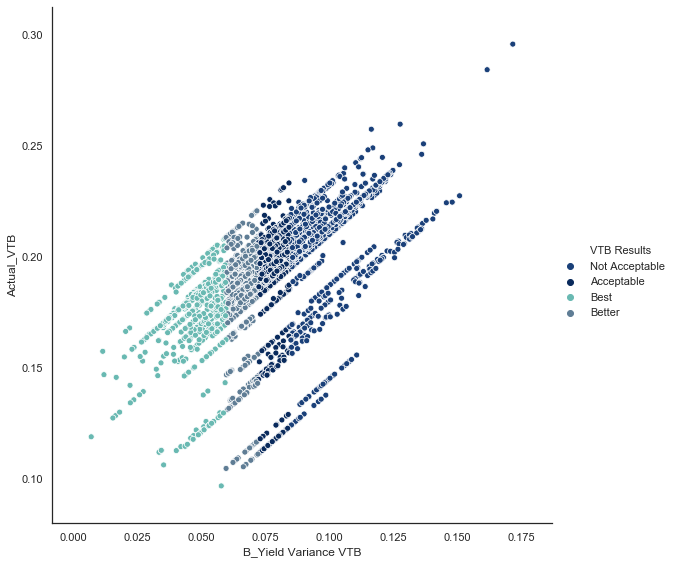

In [85]:
import seaborn as sns
sns.set(style="white")
colors = ["#1a4079","#092a5c","#69b9b2","#5f7d95"]
sns.set_palette(sns.color_palette(colors))

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="B_Yield Variance VTB", y="Actual_VTB", hue="VTB Results",
            sizes=(40, 400), alpha=1,height=8, data=binned_df);

In [31]:
best_data_actual = y_values_df[y_values_df["VTB Results"] == 'Best']
pd.set_option('display.max_columns', None)

best_data_actual.describe()

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,Y_140 Strip Lvl Pcnt,Y_152 Strip Lvl Pcnt,Y_160 Strip Lvl Pcnt,Y_Vacuum Charge Flow,Y_REFLUX,Y_PUMP AROUND,Y_Wash Flow,Y_127 to Storage Flow,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,B_Yield Variance VTB
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,731.022033,258.046943,150.002569,182.446049,209.503398,227.032520,200.028309,193.373220,235.057740,64.815675,49.999854,50.005252,63.223805,138.585821,35.080049,57.025415,3.867772,26.547691,51.351496,30.158358,2.147707,456.455350,563.398374,236.377431,27.372098,138.585821,-0.628033,0.049032
std,2.320612,4.300249,0.129397,2.818279,16.247064,15.734074,1.571367,14.918037,5.221583,1.565423,0.033646,0.133327,6.530495,4.335146,4.513527,3.728457,1.822215,3.326311,2.523512,2.100616,0.991464,5.624765,39.297132,6.348872,56.011912,4.335146,23.450798,0.009161
min,727.920000,244.150000,149.280000,178.360000,165.850000,181.970000,192.940000,174.030000,217.580000,45.460000,49.370000,49.460000,11.720000,97.010000,24.280000,38.090000,1.480000,17.610000,34.010000,18.250000,0.310000,440.280000,364.010000,225.530000,-8.870000,97.010000,-9.270000,0.006980
25%,729.980000,255.045000,149.920000,179.990000,207.065000,220.645000,199.030000,184.260000,234.195000,64.970000,49.990000,49.990000,64.870000,133.300000,32.035000,54.020000,3.110000,23.890000,49.800000,29.500000,1.620000,452.195000,550.475000,232.270000,0.040000,133.300000,-9.110000,0.044879
50%,730.030000,259.290000,150.000000,180.400000,213.220000,228.180000,199.870000,188.490000,236.220000,65.000000,50.000000,50.000000,64.980000,141.600000,34.700000,57.960000,3.240000,27.690000,50.990000,30.980000,1.980000,456.430000,565.640000,234.540000,0.090000,141.600000,-6.600000,0.051175
75%,730.090000,260.195000,150.080000,185.015000,219.450000,237.935000,201.100000,197.780000,237.485000,65.030000,50.010000,50.020000,65.010000,141.600000,36.940000,59.900000,3.900000,29.200000,53.750000,31.495000,2.410000,459.755000,583.135000,237.820000,0.645000,141.600000,0.240000,0.056150
max,740.070000,271.040000,150.450000,191.050000,239.200000,273.130000,204.570000,260.900000,302.560000,69.280000,50.270000,53.120000,65.270000,141.650000,48.070000,63.120000,13.710000,35.980000,58.000000,33.720000,9.790000,472.380000,652.460000,259.210000,238.440000,141.650000,178.000000,0.059716


In [17]:
y_describe_best = best_data_actual.describe()
y_describe_best =  y_describe_best[1:3]
y_describe_best.to_csv('Resources/y_describe_best_actual.csv',index=False)

# Correlation Matrix

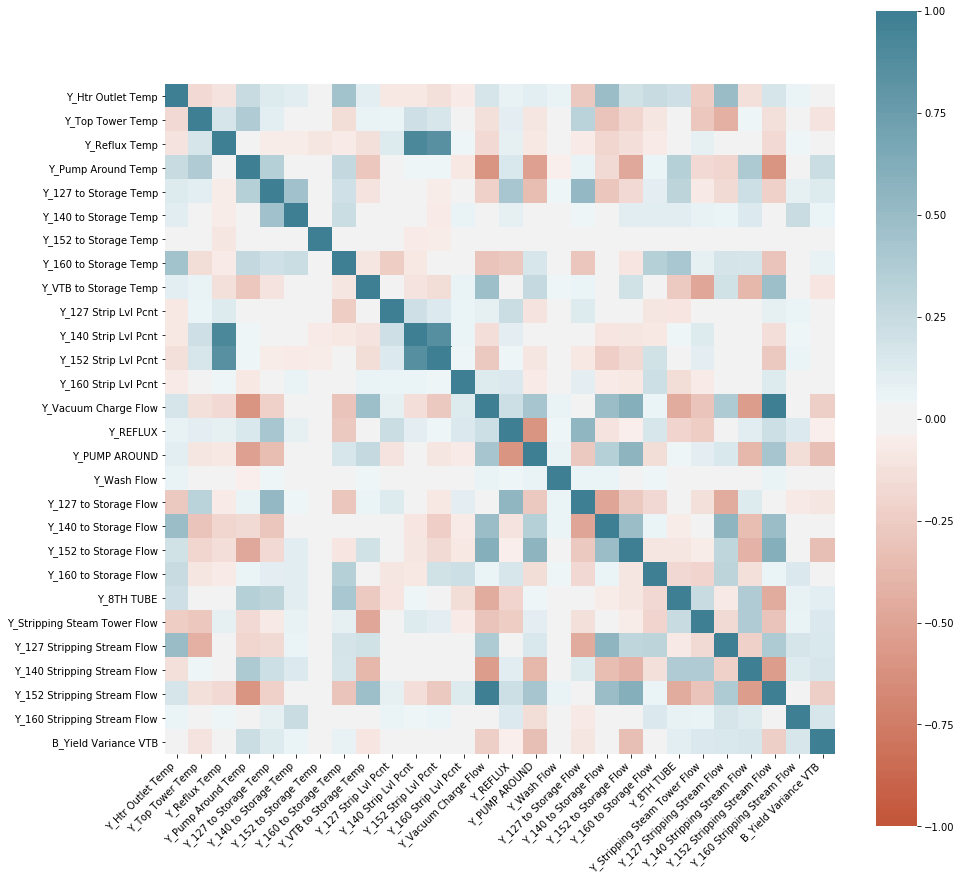

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
corr = y_values_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# ML Modeling

In [19]:
# Labels are the values we want to predict
target = np.array(y_values_df['B_Yield Variance VTB'])

# Remove the labels from the features
# axis 1 refers to the columns
data = y_values_df.drop(['B_Yield Variance VTB','VTB Results'], axis = 1)

# Saving feature names for later use
feature_list = list(data.columns)

# Convert to numpy array
data = np.array(data)

In [20]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42)

In [21]:
print('Training Data Shape:', X_train.shape)
print('Training Target Shape:', y_train.shape)
print('Testing Data Shape:', X_test.shape)
print('Testing Target Shape:', y_test.shape)

Training Data Shape: (2448, 27)
Training Target Shape: (2448,)
Testing Data Shape: (816, 27)
Testing Target Shape: (816,)


RandomForestRegressor

In [23]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train);

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%.')
print(f'Minimum Predict: {min(predictions)}')

Mean Absolute Error: 0.01
Accuracy: 86.89 %.
Minimum Predict: 0.036419931962181046


In [24]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} -- Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Y_PUMP AROUND        -- Importance: 0.14
Variable: Y_152 to Storage Flow -- Importance: 0.13
Variable: Y_127 Stripping Stream Flow -- Importance: 0.11
Variable: Y_REFLUX             -- Importance: 0.1
Variable: Y_VTB to Storage Temp -- Importance: 0.05
Variable: Y_127 to Storage Flow -- Importance: 0.05
Variable: Y_127 to Storage Temp -- Importance: 0.04
Variable: Y_140 to Storage Temp -- Importance: 0.04
Variable: Y_160 to Storage Flow -- Importance: 0.04
Variable: Y_Stripping Steam Tower Flow -- Importance: 0.04
Variable: Y_160 Stripping Stream Flow -- Importance: 0.04
Variable: Y_160 to Storage Temp -- Importance: 0.03
Variable: Y_140 to Storage Flow -- Importance: 0.03
Variable: Y_8TH TUBE           -- Importance: 0.03
Variable: Y_Htr Outlet Temp    -- Importance: 0.02
Variable: Y_Top Tower Temp     -- Importance: 0.02
Variable: Y_Pump Around Temp   -- Importance: 0.02
Variable: Y_Wash Flow          -- Importance: 0.02
Variable: Y_140 Stripping Stream Flow -- Importance: 

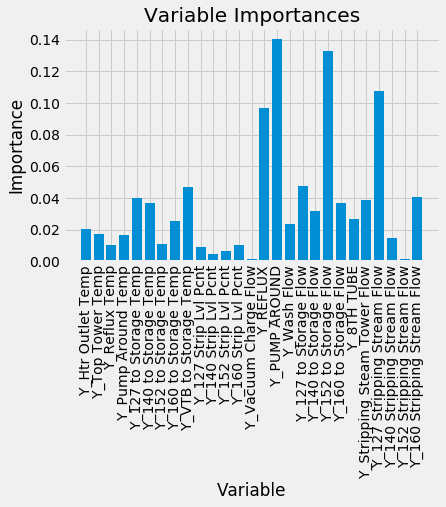

In [25]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 

Assorted Sklearn Regressor Models

In [26]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, Lars, OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, SGDRegressor, PassiveAggressiveRegressor, RANSACRegressor, TheilSenRegressor, HuberRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

models = [
    RandomForestRegressor(n_estimators= 1000, random_state=42),
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.Lasso(),
    linear_model.ElasticNet(),
    linear_model.Lars(),
    linear_model.OrthogonalMatchingPursuit(),
    linear_model.BayesianRidge(),
    linear_model.ARDRegression(),
    linear_model.SGDRegressor(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.RANSACRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.HuberRegressor(),
    MLPRegressor(),
    KNeighborsRegressor(),
    RadiusNeighborsRegressor(),
    svm.SVR()]

for item in models:
    print(item)
    model = item
    model.fit(X_train, y_train)
    print(f'Predicted:{model.predict(X_train)}')
    
    # Use the model predict method on the test data
    predictions = model.predict(X_test)

    # Calculate the absolute errors
    errors = abs(predictions - y_test)
    
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)

    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2),'%. \n')
    
    


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
Predicted:[0.06213368 0.08592696 0.05093177 ... 0.0907628  0.07712617 0.05958206]
Mean Absolute Error: 0.01
Accuracy: 86.89 %. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Predicted:[0.06402798 0.06933901 0.05962518 ... 0.08395106 0.05352472 0.0768138 ]
Mean Absolute Error: 0.01
Accuracy: 81.83 %. 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
Predicted:[0.06408291 0.06933892 

C:\Users\JPHeb\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Predicted:[0.04234685 0.06262459 0.04428168 ... 0.10140065 0.05215512 0.07452686]
Mean Absolute Error: 0.02
Accuracy: 78.41 %. 

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


C:\Users\JPHeb\Anaconda3\envs\PythonData\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Predicted:[0.52122248 0.19907874 2.66388521 ... 0.37526409 1.41315663 0.50942043]
Mean Absolute Error: 0.78
Accuracy: -1014.43 %. 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Predicted:[0.06513004 0.08267172 0.05468435 ... 0.08230791 0.07638757 0.06721995]
Mean Absolute Error: 0.01
Accuracy: 85.97 %. 

RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, p=2, radius=1.0,
                         weights='uniform')
Predicted:[0.0595949  0.09118005 0.04949153 ... 0.09244915 0.08282768 0.05386947]
Mean Absolute Error: nan
Accuracy: nan %. 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Predicted:[0.1032175 0.1032175 0.1032175 ... 0.1032175 0.1032175 0.1032175]
Mean Abs

C:\Users\JPHeb\Anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_regression.py:362: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Decision Tree Regressor

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
cross_val_score(regressor, X_train, y_train, cv=100)

# Use the forest's predict method on the test data
predictions = regressor.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)
    
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
    
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2),'%. \n')


Mean Absolute Error: 0.01
Accuracy: 81.77 %. 



In [27]:
from statsmodels.api import OLS
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              2329.
Date:                Sat, 29 Aug 2020   Prob (F-statistic):                        0.00
Time:                        10:07:55   Log-Likelihood:                          6796.1
No. Observations:                2448   AIC:                                 -1.354e+04
Df Residuals:                    2421   BIC:                                 -1.338e+04
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Principal Component Analysis

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [29]:
test_df = y_values_df.drop(['B_Yield Variance VTB','VTB Results'], axis = 1)

In [30]:
#convert it to numpy arrays
X=test_df.values

In [31]:
#Scaling the values
X = scale(X)

In [32]:
pca = PCA(n_components=27)

In [33]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=27, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
var

array([1.94329567e-01, 1.14025218e-01, 1.05802266e-01, 9.14709004e-02,
       6.06854706e-02, 5.65529723e-02, 4.97849720e-02, 3.95784987e-02,
       3.68116521e-02, 3.53513180e-02, 3.29045058e-02, 3.02241633e-02,
       2.68150535e-02, 2.25083847e-02, 1.93034874e-02, 1.67279372e-02,
       1.30166485e-02, 1.14012385e-02, 8.84145601e-03, 8.62424382e-03,
       7.93510313e-03, 6.20447084e-03, 4.95149213e-03, 2.64536072e-03,
       2.02155389e-03, 1.48206502e-03, 1.68036355e-10])

In [35]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=2)*100)
print(var1)

[ 19.  30.  41.  50.  56.  62.  67.  71.  75.  79.  82.  85.  88.  90.
  92.  94.  95.  96.  97.  98.  99. 100. 100. 100. 100. 100. 100.]


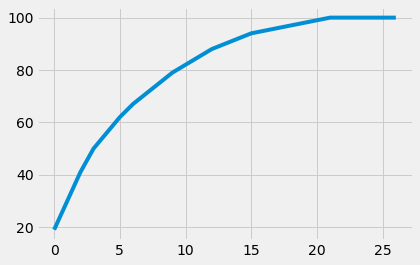

In [36]:
plt.plot(var1)

In [37]:
#Looking at above plot I'm taking 22 variables
pca = PCA(n_components=22)
pca.fit(X)
X1=pca.fit_transform(X)

print(X1)

[[-1.53314485 -0.29761409 -1.49656572 ... -0.03648114  0.27382698
   0.32206254]
 [-1.38771372 -0.48531636 -1.8583548  ...  0.06010105  0.27674017
   0.25357364]
 [-1.40145622 -0.38376037 -1.56888669 ... -0.02512456  0.07790399
   0.31327586]
 ...
 [ 2.07052638 -2.16262359  0.07982895 ... -1.00166109 -0.3320898
   0.37217688]
 [ 2.15276152 -2.79883317 -0.63040743 ... -0.63239399 -0.12877632
   0.29434881]
 [ 2.30998725 -2.64933711 -0.37734599 ... -0.63214931 -0.24861008
   0.44723166]]


### Run Models on Simulated Data (2M)

In [38]:
data_file = 'Resources/simulated_2M_data.csv'
simulated_2M = pd.read_csv(data_file)
simulated_2M.shape

(2000000, 27)

In [39]:
X_sim = simulated_2M

In [40]:
#from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=1000, random_state=42)


print(modelRF)
modelRF.fit(X_train, y_train)
    
# Use the model predict method on the test data
predictionsRF = modelRF.predict(X_sim)

print(f'Minimum Predicted VTB: {min(predictionsRF)}' )
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
Minimum Predicted VTB: 0.03288293367005176


In [41]:
#predictionsRF
simulated_2M['P_Yield Variance VTB'] = predictionsRF
simulated_2M['P_Yield Variance VTB'].describe()

count    2.000000e+06
mean     6.642904e-02
std      6.956124e-03
min      3.288293e-02
25%      6.270450e-02
50%      6.747311e-02
75%      7.094393e-02
max      9.116027e-02
Name: P_Yield Variance VTB, dtype: float64

In [42]:
vtb_describe = simulated_2M['P_Yield Variance VTB'].describe()


In [43]:
bins = [0,vtb_describe[4],vtb_describe[5],vtb_describe[6],vtb_describe[7]]

# Create the names for the five bins
group_names = ["Best", "Better", "Acceptable", "Not Acceptable"]

simulated_2M["VTB Results"] = pd.cut(simulated_2M['P_Yield Variance VTB'], bins, labels=group_names, include_lowest=True)
simulated_2M.head()

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,Y_140 Strip Lvl Pcnt,Y_152 Strip Lvl Pcnt,Y_160 Strip Lvl Pcnt,Y_Vacuum Charge Flow,Y_REFLUX,Y_PUMP AROUND,Y_Wash Flow,Y_127 to Storage Flow,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,P_Yield Variance VTB,VTB Results
0,731.514221,258.584629,149.929087,183.457016,221.646996,228.551054,200.364892,199.129099,238.948877,64.109543,49.973625,49.995503,61.357668,137.899883,35.927956,58.286791,3.796737,29.012498,48.833461,29.746167,1.791304,451.063978,531.037652,230.434223,-6.454241,140.809512,9.257164,0.069495,Acceptable
1,728.888879,261.376951,149.894580,180.277731,211.013558,220.922579,200.062752,204.083355,232.052912,65.132853,50.023026,50.103290,58.165113,137.237969,30.753329,57.546866,4.750997,28.199786,52.282879,31.161474,3.024871,454.614180,546.525025,232.897721,65.719013,136.071636,-1.110025,0.043987,Best
2,730.924492,261.372349,150.053318,181.576078,196.201927,239.280389,199.432826,207.578533,234.123931,63.383407,50.011274,50.024957,63.239844,137.052497,31.048310,56.415772,4.357183,29.816147,53.267481,30.832255,2.633165,455.589229,532.932945,234.505460,-12.278360,139.000770,-8.164898,0.055848,Best
3,729.372073,254.641603,149.924992,182.619147,199.609805,211.583501,199.249693,206.682232,234.826278,65.687832,49.973669,50.065949,65.477163,139.880522,33.094622,57.515041,3.558412,29.589653,50.361871,28.548128,1.263021,452.557532,580.200532,235.534143,25.503756,136.588800,9.801284,0.066743,Better
4,731.300118,257.212767,150.058603,184.101859,201.710161,228.671991,200.059107,195.439783,238.026033,64.403444,49.980725,50.102096,62.394961,140.375638,37.328740,56.908113,2.345141,24.998892,52.551078,30.269777,1.944481,458.787796,554.050191,237.403904,-17.701057,142.406569,6.736246,0.068570,Acceptable


In [84]:
best_data_sim_2M = simulated_2M[simulated_2M["VTB Results"] == 'Best']
pd.set_option('display.max_columns', None)
best_data_sim_2M.to_csv('Resources/2M_binned.csv')
best_data_sim_2M.describe()

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,Y_140 Strip Lvl Pcnt,Y_152 Strip Lvl Pcnt,Y_160 Strip Lvl Pcnt,Y_Vacuum Charge Flow,Y_REFLUX,Y_PUMP AROUND,Y_Wash Flow,Y_127 to Storage Flow,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,P_Yield Variance VTB
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,730.973222,258.088216,150.001938,182.443972,208.753262,225.717436,200.026140,193.104657,234.323087,64.829263,49.999840,50.005800,63.217816,138.588796,35.599488,57.059145,3.925217,26.799027,51.183319,30.956878,2.186620,456.505263,564.653373,233.284356,26.983348,138.589320,-2.233794,0.056896
std,1.351162,2.472149,0.074617,1.625596,9.217090,8.734776,0.906962,8.732251,2.890252,0.902211,0.019417,0.076921,3.770423,2.506298,2.530168,2.142407,1.028518,1.896262,1.473663,0.924664,0.569815,3.214423,22.255546,2.159782,32.471770,2.502353,13.560694,0.004563
min,728.701426,253.746696,149.873173,179.627791,193.256334,211.298454,198.456943,178.455186,229.836163,63.250261,49.966208,49.871925,56.693465,134.250683,30.566596,53.296971,2.045562,23.221391,48.828013,28.057761,1.156244,450.830660,524.101429,230.028572,-28.639804,134.250754,-24.078768,0.032883
25%,729.780001,255.960296,149.937217,181.036733,200.828349,218.291245,199.241299,185.372225,231.845574,64.047330,49.983029,49.939244,59.953532,136.415307,33.566996,55.210100,3.068350,25.190245,49.874002,30.517997,1.700709,453.738861,545.725503,231.507504,-1.419080,136.424012,-13.988814,0.054214
50%,730.952897,258.111914,150.001763,182.442925,208.382205,225.160374,200.021266,193.043610,233.994780,64.843428,49.999834,50.006448,63.212161,138.591916,35.871037,57.102303,3.935405,26.924246,51.083182,31.086255,2.207149,456.568462,564.952495,233.057811,26.782301,138.591708,-3.492584,0.057874
75%,732.147427,260.223148,150.066298,183.852468,216.508306,232.737242,200.812221,200.702517,236.582533,65.610772,50.016638,50.072330,66.477496,140.758671,37.756842,58.893411,4.809692,28.454479,52.459823,31.668808,2.684301,459.269896,583.898652,234.789037,55.235445,140.756960,9.428323,0.060588
max,733.342642,262.347181,150.131966,185.264314,225.750457,242.766351,201.599671,208.291211,240.279305,66.381082,50.033500,50.138579,69.754292,142.920961,39.593526,60.753869,5.689982,29.873981,53.874989,32.258962,3.139169,462.080084,602.695422,242.726076,83.383992,142.920964,22.822664,0.062705


In [46]:
sim_2M_describe_best = best_data_sim_2M.describe()
sim_2M_describe_best =  sim_2M_describe_best[1:3]
sim_2M_describe_best.to_csv('Resources/sim_2M_describe.csv',index=False)

### Run Models on Simulated Data (1M)

In [47]:
data_file = 'Resources/simulated_1M_data.csv'
simulated_1M = pd.read_csv(data_file)
simulated_1M.shape

(1000000, 27)

In [48]:
X_sim_1M = simulated_1M

In [49]:
#from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=1000, random_state=42)


print(modelRF)
modelRF.fit(X_train, y_train)
    
# Use the model predict method on the test data
predictionsRF = modelRF.predict(X_sim_1M)

print(f'Minimum Predicted VTB: {min(predictionsRF)}' )
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
Minimum Predicted VTB: 0.03457276271435127


In [50]:
#predictionsRF
simulated_1M['P_Yield Variance VTB'] = predictionsRF
simulated_1M['P_Yield Variance VTB'].describe()

count    1000000.000000
mean           0.056226
std            0.004825
min            0.034573
25%            0.052970
50%            0.056145
75%            0.059558
max            0.074604
Name: P_Yield Variance VTB, dtype: float64

In [51]:
vtb_describe = simulated_1M['P_Yield Variance VTB'].describe()

In [52]:
bins = [0,vtb_describe[4],vtb_describe[5],vtb_describe[6],vtb_describe[7]]

# Create the names for the five bins
group_names = ["Best", "Better", "Acceptable", "Not Acceptable"]

simulated_1M["VTB Results"] = pd.cut(simulated_1M['P_Yield Variance VTB'], bins, labels=group_names, include_lowest=True)
simulated_1M.head()

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,Y_140 Strip Lvl Pcnt,Y_152 Strip Lvl Pcnt,Y_160 Strip Lvl Pcnt,Y_Vacuum Charge Flow,Y_REFLUX,Y_PUMP AROUND,Y_Wash Flow,Y_127 to Storage Flow,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,P_Yield Variance VTB,VTB Results
0,730.241741,259.198879,149.986980,182.061596,205.031356,219.851320,200.570113,198.057326,236.234405,64.353816,49.983570,49.996098,63.079807,139.418366,35.440728,58.547604,4.711008,28.322719,51.841480,31.396002,1.771601,459.302453,565.643123,233.766902,23.982263,140.600860,-5.540983,0.050247,Best
1,731.026888,256.777167,150.061208,183.671084,200.693251,222.208473,199.609021,190.349207,235.247246,64.081042,50.004987,50.021062,65.571433,141.059888,37.385702,55.950357,3.348709,25.154000,50.417845,30.471044,1.628888,454.187778,586.204221,232.753260,53.688025,139.721486,-3.188856,0.059610,Not Acceptable
2,731.444352,256.628392,149.970153,182.980465,205.278403,229.470450,199.527247,185.397291,235.973496,64.887355,49.989145,49.951161,65.561550,140.805402,34.528454,55.223069,4.213446,25.915373,50.984554,31.476892,2.435269,454.823598,579.938783,234.919144,23.263419,139.877722,-4.938021,0.059437,Acceptable
3,731.736689,257.884950,149.943407,182.719221,212.590090,227.367008,199.437501,191.129900,233.625824,65.561249,50.002605,49.930033,59.747495,136.974671,34.734367,56.817729,4.208679,27.022269,50.907626,31.349819,2.116229,453.549878,559.009286,233.091902,31.628559,141.046604,-5.537538,0.055244,Better
4,729.776002,260.522243,149.965952,183.347129,203.914768,219.807879,199.532748,192.984527,232.074368,64.202508,50.005410,50.071594,62.021575,138.863676,37.160333,58.840803,4.803577,27.612049,51.120535,31.502906,2.379307,455.184092,552.287573,235.046062,-1.304699,136.173246,7.211790,0.051999,Best


In [85]:
best_data_sim_1M = simulated_1M[simulated_1M["VTB Results"] == 'Best']
pd.set_option('display.max_columns', None)
best_data_sim_1M.to_csv('Resources/1M_binned.csv')
best_data_sim_1M.describe()

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,Y_140 Strip Lvl Pcnt,Y_152 Strip Lvl Pcnt,Y_160 Strip Lvl Pcnt,Y_Vacuum Charge Flow,Y_REFLUX,Y_PUMP AROUND,Y_Wash Flow,Y_127 to Storage Flow,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,P_Yield Variance VTB
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,730.903717,258.166315,150.001512,182.428306,208.583544,224.407811,200.021107,193.233719,234.162062,64.837989,49.999944,50.005370,63.217669,138.590723,36.212821,57.086070,3.944480,27.134656,51.393053,31.144238,2.290076,456.639184,565.323354,232.735084,26.309211,138.579089,-4.618253,0.050125
std,0.804538,1.416426,0.043067,0.937797,5.273453,4.803886,0.521109,5.017061,1.619944,0.521598,0.011185,0.044408,2.180534,1.443627,1.324248,1.237465,0.582935,1.107946,0.778003,0.400467,0.330988,1.795079,12.707270,1.050658,19.029659,1.447610,7.641489,0.002375
min,729.619742,255.623327,149.927253,180.812710,199.530146,217.009582,199.122992,184.356227,231.427164,63.929003,49.980442,49.929010,59.437774,136.084846,33.060114,54.913095,2.892887,24.904767,49.706804,30.165675,1.619046,453.284089,542.436328,231.128934,-5.376128,136.073071,-15.819688,0.034573
25%,730.169656,256.950451,149.964033,181.617315,204.046644,220.408345,199.571978,188.890981,232.770201,64.386097,49.990282,49.967010,61.332961,137.340728,35.366343,56.014948,3.450278,26.201429,50.880146,30.763857,2.015321,455.144761,554.495104,231.866827,9.589210,137.324595,-11.116695,0.048848
50%,730.889572,258.193862,150.001473,182.424270,208.505781,223.624770,200.013538,193.275701,234.114864,64.842126,49.999937,50.005012,63.215424,138.593055,36.404025,57.110028,3.944989,27.351054,51.443637,31.113652,2.344398,456.742912,565.446069,232.601069,26.272317,138.577500,-5.918083,0.050738
75%,731.603193,259.405846,150.038753,183.238419,213.115679,228.058956,200.472187,197.575218,235.521907,65.289511,50.009634,50.043860,65.112585,139.842107,37.322895,58.157851,4.445796,28.109306,52.039092,31.493376,2.587365,458.148313,576.372791,233.469234,42.806538,139.831508,1.254761,0.051988
max,732.322007,260.562241,150.076406,184.065685,217.968068,234.448766,200.935134,201.864094,237.209827,65.734656,50.019290,50.082819,66.981443,141.094517,38.127926,59.195575,4.954942,28.698134,52.651039,31.880336,2.758857,459.719972,586.992227,235.440632,59.467764,141.086313,11.356203,0.052970


In [54]:
sim_1M_describe_best = best_data_sim_1M.describe()
sim_1M_describe_best =  sim_1M_describe_best[1:3]
sim_1M_describe_best.to_csv('Resources/sim_1M_describe.csv',index=False)

### Run Models on Simulated Data (500K)

In [55]:
data_file = 'Resources/simulated_500K_data.csv'
simulated_500K = pd.read_csv(data_file)
simulated_500K.shape

(500000, 27)

In [56]:
X_sim_500K = simulated_500K

In [57]:
#from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=1000, random_state=42)


print(modelRF)
modelRF.fit(X_train, y_train)
    
# Use the model predict method on the test data
predictionsRF = modelRF.predict(X_sim_500K)
print(f'Minimum Predicted VTB: {min(predictionsRF)}' )
  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
Minimum Predicted VTB: 0.039268125492337005


In [58]:
#predictionsRF
simulated_500K['P_Yield Variance VTB'] = predictionsRF
simulated_500K['P_Yield Variance VTB'].describe()

count    500000.000000
mean          0.050704
std           0.002744
min           0.039268
25%           0.048791
50%           0.050777
75%           0.052632
max           0.062613
Name: P_Yield Variance VTB, dtype: float64

In [59]:
vtb_describe = simulated_500K['P_Yield Variance VTB'].describe()

In [60]:
bins = [0,vtb_describe[4],vtb_describe[5],vtb_describe[6],vtb_describe[7]]

# Create the names for the five bins
group_names = ["Best", "Better", "Acceptable", "Not Acceptable"]

simulated_500K["VTB Results"] = pd.cut(simulated_500K['P_Yield Variance VTB'], bins, labels=group_names, include_lowest=True)
simulated_500K.head()

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,Y_140 Strip Lvl Pcnt,Y_152 Strip Lvl Pcnt,Y_160 Strip Lvl Pcnt,Y_Vacuum Charge Flow,Y_REFLUX,Y_PUMP AROUND,Y_Wash Flow,Y_127 to Storage Flow,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,P_Yield Variance VTB,VTB Results
0,731.305817,258.202427,150.023490,181.631243,207.874028,228.172561,200.539630,192.936289,234.047682,64.675127,49.997694,49.975061,62.674458,139.418175,35.266510,56.958761,3.724390,26.381041,51.007990,31.358789,2.353932,454.905563,574.702264,233.346416,39.163854,137.349057,-9.493587,0.053574,Not Acceptable
1,731.660376,257.132116,149.964977,181.890981,205.105972,226.702764,200.292212,198.176387,235.562979,64.845843,49.991580,49.999949,63.425607,138.653053,35.731981,55.854373,3.592961,27.956075,51.715107,31.220635,2.157588,457.667261,567.517746,231.845331,11.253838,138.204307,-9.111301,0.047884,Best
2,730.192414,257.152650,150.043623,181.689102,208.182026,220.432496,200.116694,195.571202,233.827365,64.971358,49.994621,50.012259,61.603148,138.458044,35.865255,56.941976,3.789993,26.727430,52.080975,30.756728,2.430271,455.335489,567.066608,233.604348,8.575313,138.644581,-8.563361,0.049320,Better
3,730.338525,258.206372,149.998303,181.941429,208.768812,219.750833,199.987433,192.109029,234.276205,65.131270,49.994637,49.990150,64.490556,138.415504,35.347354,57.158476,4.249931,26.512748,51.187629,31.101188,2.114149,455.357034,572.200248,232.149858,8.812155,139.218995,-10.413145,0.050071,Better
4,730.993913,257.295486,149.988567,182.028764,207.650268,221.566593,199.715013,189.577856,233.285733,65.338803,50.003697,49.966438,65.293635,138.407423,37.252790,57.106448,4.431815,26.306854,50.766621,31.445702,2.505144,457.380231,554.751245,231.897969,15.693791,139.056819,-8.310372,0.050236,Better


In [86]:
best_data_sim_500K = simulated_500K[simulated_500K["VTB Results"] == 'Best']
pd.set_option('display.max_columns', None)
best_data_sim_500K.to_csv('Resources/500K_binned.csv')
best_data_sim_500K.describe()

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,Y_140 Strip Lvl Pcnt,Y_152 Strip Lvl Pcnt,Y_160 Strip Lvl Pcnt,Y_Vacuum Charge Flow,Y_REFLUX,Y_PUMP AROUND,Y_Wash Flow,Y_127 to Storage Flow,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,P_Yield Variance VTB
count,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000,125000.000000
mean,730.903065,258.180124,150.001516,182.404267,208.583966,223.395656,200.000577,193.254962,234.138494,64.853419,49.999955,50.004461,63.240108,138.593694,36.467226,57.107789,3.933013,27.517948,51.525833,31.091643,2.349770,456.829241,565.370420,232.546728,26.336067,138.576758,-6.447117,0.047151
std,0.464812,0.818734,0.024857,0.537200,3.056118,2.480886,0.301989,2.926116,0.932248,0.303531,0.006435,0.025454,1.270432,0.834612,0.685597,0.714681,0.336805,0.600787,0.365335,0.240600,0.191106,0.996847,7.278071,0.537737,11.001731,0.835403,4.057642,0.001303
min,730.099180,256.749956,149.958445,181.490511,203.310127,219.603965,199.499999,188.216915,232.542142,64.316416,49.988759,49.960964,61.037156,137.147129,34.888820,55.848641,3.361553,26.026779,50.617043,30.743776,1.959101,454.844106,552.616338,231.684429,7.279806,137.131548,-12.259686,0.039268
25%,730.501250,257.470055,149.979978,181.938346,205.940115,221.391402,199.736670,190.696155,233.332051,64.588688,49.994434,49.982410,62.136434,137.872377,35.902844,56.489801,3.641343,27.124384,51.202404,30.874912,2.194619,456.020176,559.154184,232.095623,16.800060,137.851448,-9.892787,0.046416
50%,730.904377,258.186469,150.001563,182.395249,208.560554,222.990918,199.987109,193.275733,234.125143,64.862482,49.999958,50.003977,63.241108,138.599902,36.524775,57.119308,3.924683,27.708050,51.517025,31.070046,2.384287,456.903632,565.312495,232.503617,26.385042,138.577226,-7.142238,0.047451
75%,731.305017,258.893031,150.023050,182.857649,211.219412,225.208218,200.261181,195.820451,234.942706,65.120097,50.005506,50.026256,64.342937,139.316213,37.066878,57.735457,4.224495,28.001394,51.842796,31.296205,2.515167,457.682553,571.658612,232.944754,35.869776,139.300541,-3.551578,0.048177
max,731.708242,259.582734,150.044578,183.366095,213.856996,229.211351,200.542212,198.250537,235.781961,65.359582,50.011129,50.049775,65.398169,140.034305,37.537068,58.323535,4.527374,28.242602,52.171055,31.544703,2.621060,458.434261,578.030530,233.785735,45.338807,140.026637,3.022787,0.048791


In [62]:
round(best_data_sim_500K.var(), 5)

Y_Htr Outlet Temp                 0.21605
Y_Top Tower Temp                  0.67033
Y_Reflux Temp                     0.00062
Y_Pump Around Temp                0.28858
Y_127 to Storage Temp             9.33986
Y_140 to Storage Temp             6.15479
Y_152 to Storage Temp             0.09120
Y_160 to Storage Temp             8.56216
Y_VTB to Storage Temp             0.86909
Y_127 Strip Lvl Pcnt              0.09213
Y_140 Strip Lvl Pcnt              0.00004
Y_152 Strip Lvl Pcnt              0.00065
Y_160 Strip Lvl Pcnt              1.61400
Y_Vacuum Charge Flow              0.69658
Y_REFLUX                          0.47004
Y_PUMP AROUND                     0.51077
Y_Wash Flow                       0.11344
Y_127 to Storage Flow             0.36095
Y_140 to Storage Flow             0.13347
Y_152 to Storage Flow             0.05789
Y_160 to Storage Flow             0.03652
Y_8TH TUBE                        0.99370
Y_Stripping Steam Tower Flow     52.97032
Y_127 Stripping Stream Flow       

In [63]:
sim_500K_describe_best = best_data_sim_500K.describe()
sim_500K_describe_best =  sim_500K_describe_best[1:3]
sim_500K_describe_best.to_csv('Resources/sim_500K_describe.csv',index=False)

### Run Models on Simulated Data (250K)

In [64]:
data_file = 'Resources/simulated_250K_data.csv'
simulated_250K = pd.read_csv(data_file)
simulated_250K.shape

(250000, 27)

In [65]:
X_sim_250K = simulated_250K

In [66]:
#from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=1000, random_state=42)


print(modelRF)
modelRF.fit(X_train, y_train)
    
# Use the model predict method on the test data
predictionsRF = modelRF.predict(X_sim_250K)
print(f'Minimum Predicted VTB: {min(predictionsRF)}' )

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
Minimum Predicted VTB: 0.04243042161967863


In [67]:
#predictionsRF
simulated_250K['P_Yield Variance VTB'] = predictionsRF
simulated_250K['P_Yield Variance VTB'].describe()

count    250000.000000
mean          0.047488
std           0.001512
min           0.042430
25%           0.046413
50%           0.047488
75%           0.048560
max           0.052670
Name: P_Yield Variance VTB, dtype: float64

In [68]:
vtb_describe = simulated_250K['P_Yield Variance VTB'].describe()

In [69]:
bins = [0,vtb_describe[4],vtb_describe[5],vtb_describe[6],vtb_describe[7]]

# Create the names for the five bins
group_names = ["Best", "Better", "Acceptable", "Not Acceptable"]

simulated_250K["VTB Results"] = pd.cut(simulated_250K['P_Yield Variance VTB'], bins, labels=group_names, include_lowest=True)
simulated_250K.head()

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,Y_140 Strip Lvl Pcnt,Y_152 Strip Lvl Pcnt,Y_160 Strip Lvl Pcnt,Y_Vacuum Charge Flow,Y_REFLUX,Y_PUMP AROUND,Y_Wash Flow,Y_127 to Storage Flow,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,P_Yield Variance VTB,VTB Results
0,731.159144,258.042334,149.991252,182.024172,210.629701,221.780176,199.826475,194.999693,234.411417,64.633343,49.995186,50.025745,64.153106,138.138309,36.095353,57.276659,4.012883,27.090908,51.455869,31.145927,2.485343,456.128092,569.136854,232.405126,17.139618,139.135136,-9.982306,0.047290,Better
1,730.770871,257.751418,149.977224,182.734029,211.564724,224.161706,200.155373,194.701144,233.731987,65.016285,50.005298,50.017990,63.025858,138.875629,36.425780,57.075353,4.160957,27.806424,51.370622,31.044321,2.437935,456.717770,565.358125,232.019488,33.749754,138.952346,-3.318698,0.047042,Better
2,731.345709,258.898672,149.992772,181.943451,210.266808,224.549329,200.286042,191.696543,234.006816,64.565197,49.999454,50.002515,62.476634,139.010918,36.127034,57.697932,3.936993,28.041922,51.787172,30.995740,2.247740,457.616390,562.153313,232.612854,23.183431,138.663306,-2.455612,0.047253,Better
3,730.621683,258.221134,149.978479,182.618331,207.336018,223.168337,199.700218,193.050394,234.696445,64.806216,49.997805,49.993779,62.205353,138.767062,36.103764,56.412166,4.169711,27.850165,51.281285,31.138891,2.213276,457.722760,568.425117,232.142901,17.045068,138.794698,-3.239914,0.046700,Better
4,730.488707,257.702646,150.006241,182.399889,211.590568,224.452908,200.279895,194.684164,233.505554,64.883593,49.998041,50.005005,63.481728,137.956075,37.122448,57.326904,4.109406,28.008470,51.591735,31.134959,2.446724,457.770963,569.225985,232.599089,21.914816,137.989299,-4.868388,0.046169,Best


In [87]:
best_data_sim_250K = simulated_250K[simulated_250K["VTB Results"] == 'Best']
pd.set_option('display.max_columns', None)
best_data_sim_250K.to_csv('Resources/250K_binned.csv')
best_data_sim_250K.describe()

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,Y_140 Strip Lvl Pcnt,Y_152 Strip Lvl Pcnt,Y_160 Strip Lvl Pcnt,Y_Vacuum Charge Flow,Y_REFLUX,Y_PUMP AROUND,Y_Wash Flow,Y_127 to Storage Flow,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,P_Yield Variance VTB
count,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000,62500.000000
mean,730.904857,258.185421,150.001531,182.392361,208.531275,222.837568,199.970033,193.290737,234.128118,64.869048,49.999975,50.003768,63.239789,138.589561,36.510035,57.127480,3.921629,27.837957,51.520809,31.067144,2.390483,456.936860,565.253525,232.502500,26.298694,138.576587,-7.142060,0.045547
std,0.268198,0.474329,0.014485,0.305533,1.747426,1.187636,0.176659,1.700085,0.535514,0.178616,0.003669,0.014626,0.732256,0.481244,0.400523,0.417359,0.194829,0.238337,0.210468,0.140385,0.103715,0.548387,4.160454,0.294954,6.348734,0.482046,2.283797,0.000660
min,730.438259,257.361399,149.976660,181.867081,205.527875,220.914797,199.698596,190.328853,233.206252,64.549905,49.993520,49.979008,61.969711,137.759126,35.781653,56.393108,3.596212,26.917366,51.160505,30.851060,2.158674,455.832627,558.092633,232.009004,15.334553,137.741368,-10.504754,0.042430
25%,730.672190,257.776568,149.988885,182.126935,207.029538,221.948449,199.810143,191.812250,233.666367,64.713523,49.996815,49.991031,62.604652,138.170096,36.165849,56.763742,3.751519,27.723388,51.338931,30.941845,2.312361,456.504722,561.740395,232.252597,20.787823,138.160839,-9.184818,0.045141
50%,730.906772,258.184040,150.001575,182.392114,208.501473,222.747106,199.955226,193.317257,234.120442,64.876284,49.999960,50.003416,63.240405,138.588933,36.530639,57.136416,3.913122,27.903085,51.518793,31.053643,2.411275,456.972057,565.131452,232.488996,26.276269,138.575361,-7.447703,0.045682
75%,731.136730,258.596868,150.014266,182.652074,210.019582,223.448002,200.121067,194.768579,234.586196,65.028908,50.003141,50.016268,63.872008,139.004971,36.865434,57.495087,4.089704,28.011658,51.701658,31.188302,2.477240,457.406722,568.792630,232.741401,31.784789,138.992196,-5.281885,0.046085
max,731.367869,258.998818,150.026373,182.941461,211.640053,225.876515,200.302531,196.180964,235.070703,65.156933,50.006391,50.029913,64.510518,139.428305,37.152814,57.822465,4.269811,28.118725,51.891161,31.332239,2.540877,457.826074,572.648200,233.084440,37.337128,139.412150,-2.390437,0.046413


In [72]:
sim_250K_describe_best = best_data_sim_250K.describe()
sim_250K_describe_best =  sim_250K_describe_best[1:3]
sim_250K_describe_best.to_csv('Resources/sim_250K_describe.csv',index=False)

In [82]:
#round(best_data_sim_250K.var(), 5)


### Run Models on Simulated Data (250K)

In [73]:
data_file = 'Resources/simulated_125K_data.csv'
simulated_125K = pd.read_csv(data_file)
simulated_125K.shape

(125000, 27)

In [74]:
X_sim_125K = simulated_125K

In [75]:
#from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=1000, random_state=42)


print(modelRF)
modelRF.fit(X_train, y_train)
    
# Use the model predict method on the test data
predictionsRF = modelRF.predict(X_sim_125K)
print(f'Minimum Predicted VTB: {min(predictionsRF)}' )

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
Minimum Predicted VTB: 0.042526595272761945


In [76]:
#predictionsRF
simulated_125K['P_Yield Variance VTB'] = predictionsRF
simulated_125K['P_Yield Variance VTB'].describe()

count    125000.000000
mean          0.045503
std           0.000900
min           0.042527
25%           0.044850
50%           0.045476
75%           0.046115
max           0.048832
Name: P_Yield Variance VTB, dtype: float64

In [77]:
vtb_describe = simulated_125K['P_Yield Variance VTB'].describe()

In [89]:
bins = [0,vtb_describe[4],vtb_describe[5],vtb_describe[6],vtb_describe[7]]

# Create the names for the five bins
group_names = ["Best", "Better", "Acceptable", "Not Acceptable"]

simulated_125K["VTB Results"] = pd.cut(simulated_250K['P_Yield Variance VTB'], bins, labels=group_names, include_lowest=True)
simulated_125K.head()
simulated_125K.to_csv('Resources/125K_binned.csv')

In [90]:
best_data_sim_125K = simulated_125K[simulated_125K["VTB Results"] == 'Best']
pd.set_option('display.max_columns', None)
best_data_sim_125K.to_csv('Resources/125K_best.csv')
best_data_sim_125K.describe()

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,Y_140 Strip Lvl Pcnt,Y_152 Strip Lvl Pcnt,Y_160 Strip Lvl Pcnt,Y_Vacuum Charge Flow,Y_REFLUX,Y_PUMP AROUND,Y_Wash Flow,Y_127 to Storage Flow,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,P_Yield Variance VTB
count,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000
mean,730.907134,258.181956,150.001705,182.389822,208.546422,222.817033,199.968541,193.281612,234.134484,64.867126,49.999981,50.003722,63.247705,138.587105,36.511962,57.128834,3.920849,27.835779,51.524484,31.066529,2.390666,456.940644,565.252032,232.500425,26.258864,138.581211,-7.153510,0.045503
std,0.154489,0.270857,0.008356,0.177638,1.012368,0.689880,0.102788,0.976097,0.306492,0.104134,0.002131,0.008426,0.423465,0.278971,0.229693,0.243131,0.113617,0.136560,0.121140,0.081953,0.059916,0.314838,2.397593,0.170414,3.713717,0.276601,1.314568,0.000905
min,730.636949,257.711490,149.987054,182.087414,206.784052,221.650322,199.793394,191.592398,233.592797,64.690447,49.996307,49.989147,62.507568,138.108372,36.109588,56.710463,3.726810,27.599632,51.310387,30.926780,2.286790,456.388522,561.095498,232.207548,19.955294,138.094584,-9.423984,0.042967
25%,730.770766,257.949993,149.994399,182.235631,207.663713,222.226749,199.878553,192.448972,233.873154,64.776006,49.998158,49.996487,62.891060,138.342902,36.319178,56.912590,3.822835,27.719607,51.420641,30.993492,2.339338,456.666100,563.160652,232.351295,22.931606,138.341929,-8.285147,0.044847
50%,730.910990,258.182541,150.001971,182.390057,208.549945,222.797888,199.969043,193.245758,234.138866,64.866336,49.999959,50.003642,63.249072,138.591769,36.507927,57.129852,3.919411,27.832684,51.525893,31.066479,2.390477,456.947989,565.281537,232.500227,26.306159,138.583777,-7.182865,0.045483
75%,731.039253,258.409714,150.008964,182.544699,209.441382,223.411953,200.057126,194.124034,234.402349,64.958291,50.001850,50.010979,63.619225,138.826780,36.710579,57.337233,4.019379,27.952546,51.631307,31.138884,2.442432,457.212686,567.306941,232.645597,29.536767,138.817170,-6.014545,0.046121
max,731.173010,258.659408,150.016006,182.697697,210.278127,224.024508,200.146685,194.990405,234.663595,65.047529,50.003643,50.018387,63.971631,139.070587,36.910328,57.544707,4.116330,28.076230,51.731277,31.207474,2.494088,457.484323,569.413813,232.797396,32.645466,139.058386,-4.859156,0.048350


In [80]:
sim_125K_describe_best = best_data_sim_125K.describe()
sim_125K_describe_best =  sim_125K_describe_best[1:3]
sim_125K_describe_best.to_csv('Resources/sim_125K_describe.csv',index=False)

In [81]:
round(best_data_sim_125K.var(), 5)

Y_Htr Outlet Temp                0.02387
Y_Top Tower Temp                 0.07336
Y_Reflux Temp                    0.00007
Y_Pump Around Temp               0.03156
Y_127 to Storage Temp            1.02489
Y_140 to Storage Temp            0.47593
Y_152 to Storage Temp            0.01057
Y_160 to Storage Temp            0.95277
Y_VTB to Storage Temp            0.09394
Y_127 Strip Lvl Pcnt             0.01084
Y_140 Strip Lvl Pcnt             0.00000
Y_152 Strip Lvl Pcnt             0.00007
Y_160 Strip Lvl Pcnt             0.17932
Y_Vacuum Charge Flow             0.07782
Y_REFLUX                         0.05276
Y_PUMP AROUND                    0.05911
Y_Wash Flow                      0.01291
Y_127 to Storage Flow            0.01865
Y_140 to Storage Flow            0.01467
Y_152 to Storage Flow            0.00672
Y_160 to Storage Flow            0.00359
Y_8TH TUBE                       0.09912
Y_Stripping Steam Tower Flow     5.74845
Y_127 Stripping Stream Flow      0.02904
Y_140 Stripping 

In [100]:
opt =  sim_125K_describe_best[0:1]

In [105]:
final_opt = round(opt)
final_opt.to_csv('Resources/final_opt.csv')

In [108]:
final_opt = final_opt.T

In [128]:
final_opt["Range"] = max
final_opt.to_csv('Resources/final_opt.csv')

In [127]:
final_opt

,mean,Range
Y_Htr Outlet Temp,731.0,740.26
Y_Top Tower Temp,258.0,292.61
Y_Reflux Temp,150.0,189.24
Y_Pump Around Temp,182.0,197.18
Y_127 to Storage Temp,209.0,313.38
Y_140 to Storage Temp,223.0,375.51
Y_152 to Storage Temp,200.0,204.79
Y_160 to Storage Temp,193.0,376.98
Y_VTB to Storage Temp,234.0,354.90
Y_127 Strip Lvl Pcnt,65.0,75.48


In [122]:
maxRange = y_values_df.describe()
maxRange

,Y_Htr Outlet Temp,Y_Top Tower Temp,Y_Reflux Temp,Y_Pump Around Temp,Y_127 to Storage Temp,Y_140 to Storage Temp,Y_152 to Storage Temp,Y_160 to Storage Temp,Y_VTB to Storage Temp,Y_127 Strip Lvl Pcnt,Y_140 Strip Lvl Pcnt,Y_152 Strip Lvl Pcnt,Y_160 Strip Lvl Pcnt,Y_Vacuum Charge Flow,Y_REFLUX,Y_PUMP AROUND,Y_Wash Flow,Y_127 to Storage Flow,Y_140 to Storage Flow,Y_152 to Storage Flow,Y_160 to Storage Flow,Y_8TH TUBE,Y_Stripping Steam Tower Flow,Y_127 Stripping Stream Flow,Y_140 Stripping Stream Flow,Y_152 Stripping Stream Flow,Y_160 Stripping Stream Flow,B_Yield Variance VTB
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.00000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000
mean,731.521581,256.819994,150.014709,183.524458,213.231088,230.823621,199.995843,197.095999,234.005184,64.567353,50.002494,50.019449,63.075334,136.801489,35.022711,54.681495,3.667393,26.092907,51.467953,28.586008,2.26269,457.745055,569.676293,239.264874,47.272218,136.801477,8.779249,0.075925
std,3.037210,5.860524,0.740130,2.732432,17.302324,19.185515,1.941896,16.314678,6.810913,2.784441,1.003332,1.153270,7.040076,4.489203,4.598308,4.618757,1.325059,3.372218,2.926522,2.824584,1.48500,5.660685,50.374030,7.082030,67.414344,4.489207,37.926421,0.019713
min,661.700000,187.500000,138.120000,176.140000,120.180000,162.770000,180.830000,170.900000,189.480000,17.120000,16.660000,25.380000,-0.600000,67.920000,12.190000,17.750000,1.290000,6.610000,5.970000,0.010000,0.30000,432.750000,116.250000,225.450000,-8.880000,67.920000,-9.270000,0.006980
25%,729.990000,254.710000,149.920000,180.200000,206.697500,222.505000,198.830000,186.540000,229.645000,64.970000,49.990000,49.990000,64.870000,133.300000,32.087500,50.880000,3.110000,23.980000,49.510000,26.410000,1.55000,453.780000,549.797500,234.280000,0.060000,133.300000,-9.010000,0.063082
50%,730.040000,255.460000,150.010000,184.820000,215.375000,229.465000,199.990000,191.380000,236.085000,65.000000,50.000000,50.000000,64.990000,133.310000,34.520000,54.320000,3.250000,25.990000,51.000000,29.000000,1.99000,457.210000,570.420000,236.760000,0.110000,133.310000,0.180000,0.075172
75%,734.870000,260.012500,150.090000,185.140000,222.912500,238.660000,201.290000,204.775000,237.870000,65.030000,50.010000,50.020000,65.010000,141.600000,37.382500,58.950000,3.832500,28.900000,54.000000,31.000000,2.57000,461.502500,604.950000,244.207500,110.247500,141.600000,0.310000,0.087553
max,740.260000,292.610000,189.240000,197.180000,313.380000,375.510000,204.790000,376.980000,354.900000,75.480000,95.840000,103.480000,75.540000,141.790000,66.870000,65.270000,14.190000,36.030000,58.520000,33.930000,49.44000,474.360000,671.930000,260.100000,278.230000,141.790000,195.030000,0.199455


In [120]:
max =  maxRange.iloc[7] 

In [121]:
max

Y_Htr Outlet Temp               740.260000
Y_Top Tower Temp                292.610000
Y_Reflux Temp                   189.240000
Y_Pump Around Temp              197.180000
Y_127 to Storage Temp           313.380000
Y_140 to Storage Temp           375.510000
Y_152 to Storage Temp           204.790000
Y_160 to Storage Temp           376.980000
Y_VTB to Storage Temp           354.900000
Y_127 Strip Lvl Pcnt             75.480000
Y_140 Strip Lvl Pcnt             95.840000
Y_152 Strip Lvl Pcnt            103.480000
Y_160 Strip Lvl Pcnt             75.540000
Y_Vacuum Charge Flow            141.790000
Y_REFLUX                         66.870000
Y_PUMP AROUND                    65.270000
Y_Wash Flow                      14.190000
Y_127 to Storage Flow            36.030000
Y_140 to Storage Flow            58.520000
Y_152 to Storage Flow            33.930000
Y_160 to Storage Flow            49.440000
Y_8TH TUBE                      474.360000
Y_Stripping Steam Tower Flow    671.930000
Y_127 Strip